# Statistics for Data Science and Business Analysis

This notebook is meant to serve as a personal reference for the material covered in the Udemy course [Statistics for Data Science and Business Analysis](https://www.udemy.com/statistics-for-data-science-and-business-analysis).

I will define and illustrate (where applicable) the concepts that are covered.

**Contents:**
- Section 2: Sample vs. Population Data 
    - [Terms](#section2terms)
    - [Notes](#section2notes)
    
     
- Section 3: Fundamentals of Descriptive Statistics
    - [Types of Data](#s3_1)
    - [Levels of Measurement](#s3_2)
    - [Categorical Variables: Visualization Techniques](#s3_3)
    - [The Histogram](#s3_4)
    - [Cross Table and Scatter Plot](#s3_5)
    
    
- Section 4: Measures of central tendency, asymmetry, and variability
    - [Measures of Central Tendency](#s4_1)
    - [Skewness](#s4_2)
    - [Variance](#s4_3)
    - [Standard Deviation and Coefficient of Variation](#s4_4)
    - [Covariance](#s4_5)
    - [Correlation](#s4_6)
    
- Section 6: Distributions
    - [What is a Distribution?](#s6_1)
    - [The Normal Distribution](#s6_2)
    - [The Standard Normal Distribution](#s6_3)
    - [Understanding the Central Limit Theorem](#s6_4)
    - [Standard Error](#s6_5)

## Section 2: Sample vs. Population Data

<a id='section2terms'></a>
### Terms

* **population**
    - the collections of all items of interest in a study; denoted N
* **sample**
    - a subset of the population; denoted n
* **parameter**
    - a value that refers to a population, the opposite of a statistic
* **statistic**
    - a value that refers to a sample, the opposite of a parameter
* **random sample**
    - a random sample is collected when each member of the sample is chosen from the population strictly by chance

<a id='section2notes'></a>
### Notes

* You will almost always be working with sample data and be making data driven decisions and inferences based on  it
* Samples are key to accurate statistical insights and have two defining characteristics, randomness and representativeness
    * a random sample is chosen when each member of the population is chosen strictly by chance
    * a representative sample is a subset of the population that accurately reflects the members of the entire population
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/mtcars.csv')
diamonds = pd.read_csv('data/diamonds.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


The **population** of the mtcars dataset is all 32 entries within the dataset whereas a **sample** is a subset.

In [3]:
sample = df.sample(5)

This **sample** of 5 cars pulled from the dataset is pulled using datas built in sample function.

The mean mpg of the mtcars **population** would be a **parameter**

In [4]:
df['mpg'].mean()

20.090624999999996

The mean mpg of the **sample** that we pulled would be known as a **statistic**

In [5]:
sample['mpg'].mean()

22.96

## Section 3: Fundamentals of Descriptive Statistics

<a id='s3_1'></a>
### **Types of Data**

* **representative sample**
    - A representative sample is a subset of the population that accurately reflects the members of the entire population.
* **variable**
   - a variable is a set of characteristics of a person, object, thing, idea, etc. variables can vary from case to case
* **types of data**
   - a way to classify data. there are two types of data - categorical and numerical
* **categorical data**
   - a subset of types of data. describes categories or groups
* **numerical data**
    - A subset of types of data. Represents numbers. Can be further divided into discrete and continuous.
* **discrete data**
    - Data that can be counted in a finite matter. Opposite of continuous.
* **continuous data**
    - Data that is 'infinite' and impossible to count. Opposite of discrete.
        
        

### **Types of Data**


- We can classify data in two main ways, based on its type and its measurement level.
- Numbers can be both interval or ratio, but you have to be careful with the context you are operating in.

<a id='s3_2'></a>
###  **Levels of Measurement**


* **levels of measurement**
    - A way to classify data. There are two levels of measurement - qualitative and quantitative, which are further divided into nominal & ordinal, and ratio & interval, respectively. 
* **qualitative data**
    - A subset of levels of measurement. There are two types of qualitative data : nominal and ordinal.
* **quantitative data**
    - A subset of levels of measurement. There are two types of quantitative data - ratio and interval.
* **nominal**
    - Refers to variables that describe different categories and cannot be put in any order.
* **ordinal**
    - Refers to variables that describe different categories, but can be ordered.
* **ratio**
    - A number, no matter if whole or a fraction. There exists a unique and unambiguous zero point. 
* **interval**
    - An interval variable represents a number or an interval. There isn't a unique and unambiguous zero point. For example, degrees in Celsius and Fahrenheit are interval variables, while Kelvin is a ratio variable.
        
        

<a id='s3_3'></a>
### **Categorical Variables: Visualization Techniques**
* **frequency distribution table**
    - A table that represents the frequency of each variable.
* **frequency**
    - Measures the occurrence of a variable.
* **absolute frequency**
    - Measures the NUMBER of occurrences of a variable.
* **relative frequency**
    - Measures the RELATIVE NUMBER of occurrences of a variable. Usually, expressed in percentages. 
* **cumulative frequency**
    - The sum of relative frequencies so far. The cumulative frequency of all members is 100% or 1. 
* **pareto diagram**
    - A special type of bar chart, where frequencies are shown in descending order. There is an additional line on the chart, showing the cumulative frequency.
        
        

**Notes**


- Visualizing data is the most intuitive way to interpret it. It is much easier to visualize data if you know what type it is.
- Some of the most common ways to visualize categorical data are frequency distribution tables, bar charts, pie charts, and pareto diagrams.

**Frequency Distribution Table**

In [6]:
diamonds['cut'].value_counts(ascending=True)

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

In [7]:
diamonds['cut'].value_counts(ascending=False)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

#### **Bar Chart**

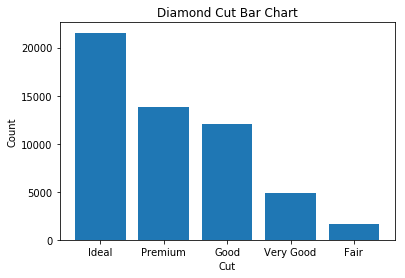

In [8]:
y_pos = np.arange(len(diamonds['cut'].unique()))
plt.bar(y_pos, diamonds['cut'].value_counts(), align = 'center')
plt.xticks(y_pos, diamonds['cut'].unique())
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Diamond Cut Bar Chart')

plt.show()

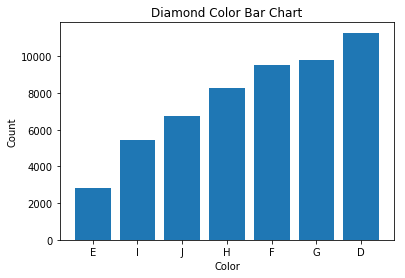

In [9]:
y_pos = np.arange(len(diamonds['color'].unique()))
plt.bar(y_pos, diamonds['color'].value_counts(ascending = True), align = 'center')
plt.xticks(y_pos, diamonds['color'].unique())
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Diamond Color Bar Chart')

plt.show()

#### Pie Chart

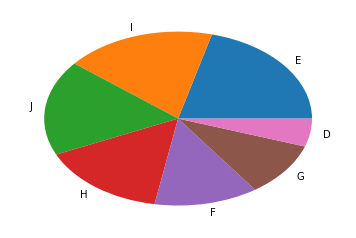

In [10]:
plt.pie(diamonds['color'].value_counts(), labels = diamonds['color'].unique())

plt.show()

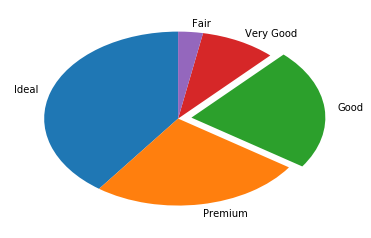

In [11]:
plt.pie(diamonds['cut'].value_counts(), explode = [0,0,.1,0,0], startangle = 90, labels = diamonds['cut'].unique())

plt.show()

#### Pareto Diagram

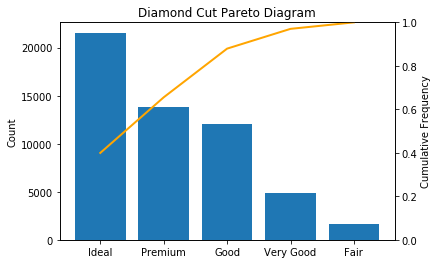

In [12]:
values = diamonds['cut'].value_counts()
labels = np.arange(len(diamonds['cut'].unique()))

yvalues = []
xvalues = range(len(diamonds['cut'].unique()))

tmp = 0
for x in diamonds['cut'].value_counts():
    tmp += x/len(diamonds)
    yvalues.append(tmp)
    
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
    
ax1.bar(labels, values, align = 'center')
ax1.set_ylabel('Count')
ax2.plot(xvalues, yvalues, color = 'orange', linewidth = 2, linestyle = '-')
ax2.set_ylim(0,1)
ax2.set_ylabel('Cumulative Frequency')
plt.xticks(labels, diamonds['cut'].unique())
plt.title('Diamond Cut Pareto Diagram')

plt.show()

The pareto diagram combines the best parts of bar and pie charts. It is named after the Italian economist Vilfredo Pareto. It shows how subtotals change with each additional category.

Vilfredo Pareto is also the namesake of the Pareto Principle, which states that 80% of the effects come from 20% of the causes. In business, this principle applies to say that 80% of sales come from 20% of the customers. In software development, Microsoft has said that solving 20% of software bugs can fix 80% of the problems.

<a id='s3_4'></a>
### **The Histogram**
* **histogram**
   - A type of bar chart that represents numerical data. It is divided into intervals (or bins) that are not overlapping and span from the first observation to the last. The intervals (bins) are adjacent - where one stops, the other starts.
* **bins**
   - The intervals that are represented in a histogram.


When working with numerical variables, it makes much more sense to group the data into intervals and then plot the corresponding frequency. This allows for a meaningful visual representation.

Interval width is described by the following formula

$$\frac{\textsf{max} - \textsf{min}}{\textsf{number of intervals}}$$

A number is included in an interval if:

1.) That number is $\gt$ than the lower bound

2.) That number is $\leq$ to the upper bound

Relative frequency is given by the following formula

$$\textsf{relative frequency} = \frac{\textsf{frequency}}{\textsf{total frequency}}$$

Sometimes there is justification to create a histogram with unequal intervals, such as when targeting specific age groups with a study. In most cases, it is most appropriate to use equal intervals.

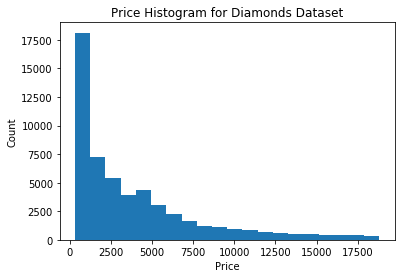

In [13]:
plt.hist(diamonds['price'], bins = 20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Histogram for Diamonds Dataset')

plt.show()

<a id='s3_5'></a>
### **Cross table and Scatter Plot**
* **cross table**
    - A table which represents categorical data. On one axis we have the categories, and on the other - their frequencies. It can be built with absolute or relative frequencies.
* **contingency table**
    - See cross table.
    
Cross tables are an easy way to get a feel for the distribution of two categorical variables.
    

In [14]:
pd.crosstab(diamonds['color'], diamonds['clarity'], margins = True)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,All
color,,,,,,,,,
D,42,73,2083,1370,705,1697,252,553,6775
E,102,158,2426,1713,1281,2470,656,991,9797
F,143,385,2131,1609,1364,2201,734,975,9542
G,150,681,1976,1548,2148,2347,999,1443,11292
H,162,299,2275,1563,1169,1643,585,608,8304
I,92,143,1424,912,962,1169,355,365,5422
J,50,51,750,479,542,731,74,131,2808
All,741,1790,13065,9194,8171,12258,3655,5066,53940


An easy way to visualize two categorical variables at the same time is using what's known as a side-by side bar chart.

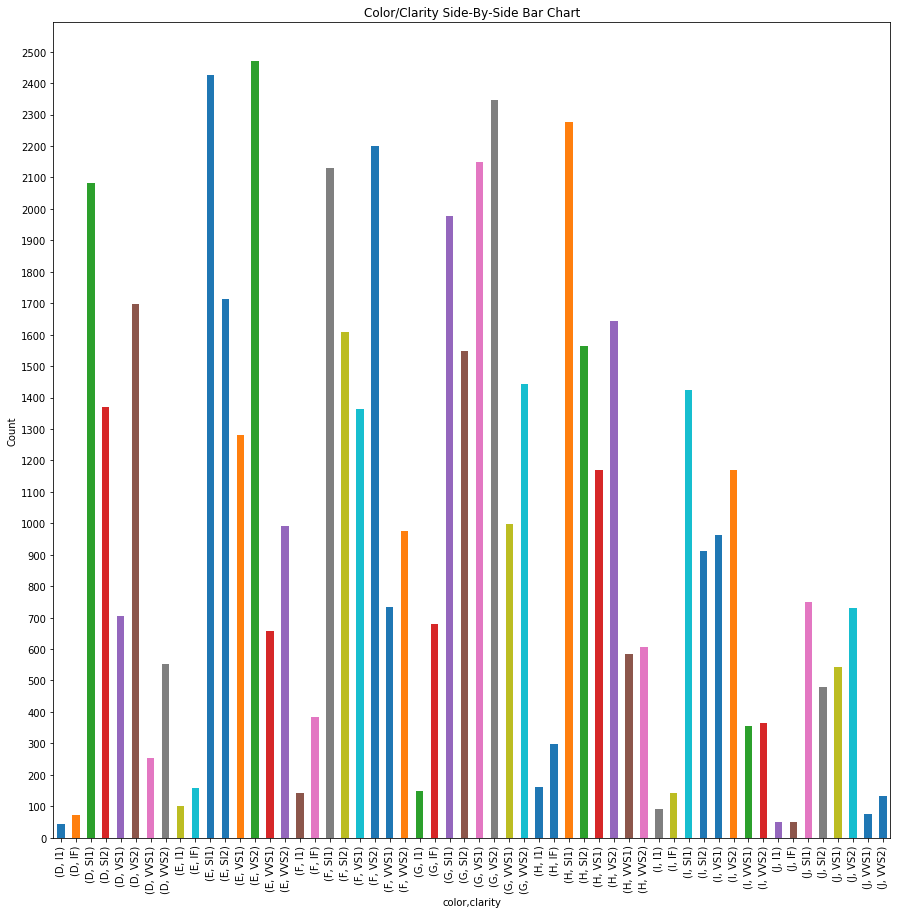

In [15]:
#https://stackoverflow.com/a/47494809
ax = diamonds.groupby(['color','clarity'])['clarity'].count().plot.bar(figsize = (15,15), title = 'Color/Clarity Side-By-Side Bar Chart', yticks = range(0,2600,100));
ax.set_ylabel('Count')
plt.savefig('img/side_by_side.png')

In [16]:
diamonds['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

This plot has a bit too much going on to be readily interpreted. There is simply too much information to process. It might be easier to compare a few colors at a time. Further, the visual encoding is more confusing than anything as we are actually examining the color of the diamonds in this graph. There are also far too many colors for anyone to look at the graph and quickly decipher what's going on.

I'll take another shot at the graph, looking at only three colors of diamond this time, and cycling through colors that represent the quality of the diamonds in question.

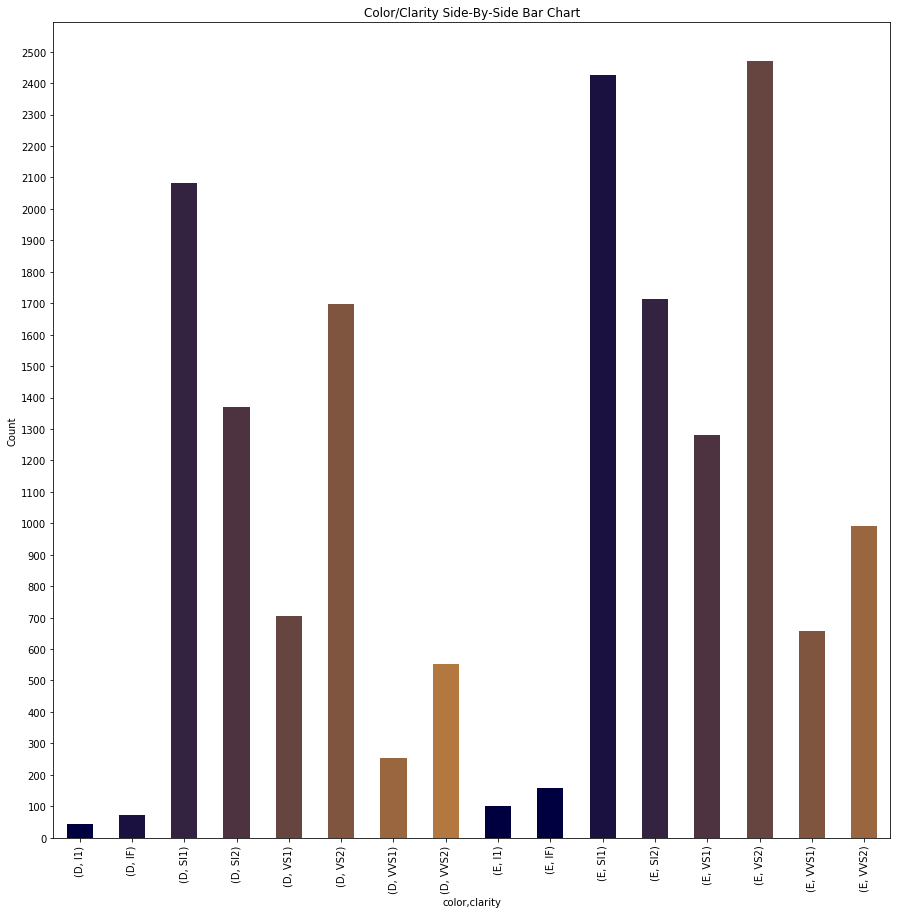

In [17]:
diamonds2 = diamonds.query('color == "D" or color == "E"')
#https://stackoverflow.com/a/11927922
my_colors = [(x/10.0, x/15.0, .25) for x in range(len(diamonds['clarity'].unique()))] 
ax = diamonds2.groupby(['color','clarity'])['clarity'].count().plot.bar(figsize = (15,15), title = 'Color/Clarity Side-By-Side Bar Chart', yticks = range(0,2600,100), color = my_colors);
ax.set_ylabel('Count')
plt.savefig('img/side_by_side2.png')

* **scatter plot**
    - A plot that represents numerical data. Graphically, each observation looks like a point on the scatter plot.

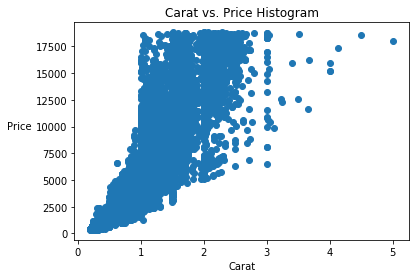

In [18]:
plt.scatter(diamonds['carat'],diamonds['price'])
plt.title('Carat vs. Price Histogram')
plt.xlabel('Carat')
plt.ylabel('Price',  horizontalalignment = 'right', rotation = 0);

Outliers are points with extreme values that go against the logic of the dataset. These can be observed in the above graph in the top right. These are very large diamonds, much larger than the majority of the other observations. The bulk of the diamonds in the dataset fall in the 0-1.5 carat range. We can use a histogram to observe this distribution.

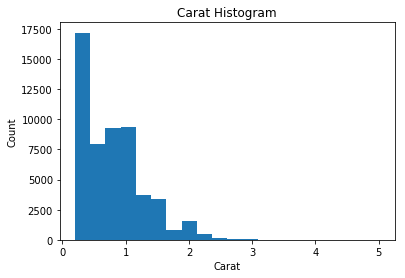

In [19]:
plt.hist(diamonds['carat'], bins = 20)
plt.title('Carat Histogram')
plt.ylabel('Count')
plt.xlabel('Carat')
plt.show()

Here we can see confirmed what we observed in the scatterplot. The vast majority of the diamonds are actually between 0 and 1 carats.

Going back to the original histogram, we can describe this graph as overplotted. [Overplotting](https://www.displayr.com/what-is-overplotting/) is when the data or labels in a data visualization overlap, making it difficult to see individual data points in a data visualization.

I will reduce the alpha which affects the opacity of the datapoints. With a value of .1, 10 identical data points will correspond with a fully colored in data point on the graph. I'll also reduce the size of the points to hopefully improve the visualization in the overplotted areas of the graph. You can also 'jitter' the points to add a small amount of random noise to the graph to improve the visualization.

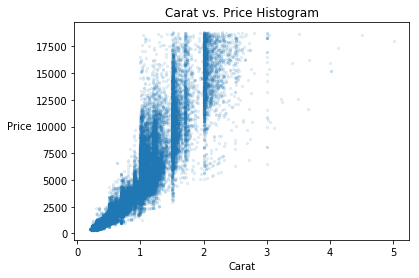

In [20]:
plt.scatter(diamonds['carat'],diamonds['price'], alpha = .1, s = 5)
plt.title('Carat vs. Price Histogram')
plt.xlabel('Carat')
plt.ylabel('Price',  horizontalalignment = 'right', rotation = 0)
plt.show()

## Measures of central tendency, asymmetry, and variability

<a id='s4_1'></a>
### **Mean, median, and mode**

* **measures of central tendency**
    - Measures that describe the data through the so called 'averages'. The most common are the mean, median and mode. There is also geometric mean, harmonic mean, weighted-average mean, etc.

* **mean**
    - The simple average of the dataset. Denoted by $\mu$
    
The formula for the mean is:

$$\large\frac{\sum_{i = 1}^N{x_i}}{N}$$

Where N is the number of components

In other words, the mean is calculated by adding up all the components and then dividing by the number of components.

-The most common measure of central tendency, the weakness is that it is very easily affected by outliers.

In [21]:
diamonds['price'].mean()

3932.799721913237

* **median**
    - The middle number in an ordered dataset.
    
The median number is at the index given by the following formula in an ordered list:

$$\large\frac{n+1}{2}$$

There is no middle number in a an ordered list with an even number of elements. In cases like this, the median is the simple average of the middle two elements.

In [22]:
diamonds['carat'].median()

0.7

* **mode**
    - The value that occurs most often. A dataset can have 0, 1 or multiple modes.
    
2 or 3 modes is usually tolerable and meaningful. When you have more than that the mode as a measure of central tendency is essentially meaningless.

In [23]:
diamonds['price'].mode()

0    605
dtype: int64

**There is no best measure of central tendency, however, you almost never want to use just one**

<a id='s4_2'></a>
### **Skewness**
* **measures of asymmetry**
    - Measures that describe the data through the level of symmetry that is observed. The most common are skewness and kurtosis.
* **skewness**
    - A measure that describes the symmetry of the dataset around its mean.
    
Software will almost always perform the calculation of skewness for you. 

Skewness measures whether a data distribution is concentrated on one side.

$\textsf{If mean} \gt \textsf{median} \rightarrow \textsf{positive/right skew}$

The right skew indicates where the tail is as opposed to the concentration of the data. In other words, the outliers lie to the right

$\textsf{If mean} = \textsf{median} = \textsf{mode} \rightarrow \textsf{zero/no skew}$

Another way to describe zero skew is to say that the distribution is symmetrical

$\textsf{If mean} \lt \textsf{median} \rightarrow \textsf{negative/left skew}$

In a left skewed distribution, the outliers lie to the left.

Skewness tells us about where the data is distributed, and is an important part of valid statistical analysis.

**Measures of asymmetry are the link between measures of central tendency and probability theory.**

In [24]:
for x in list(diamonds):
    try:
        print(x, diamonds[x].mean(), diamonds[x].median())
    except:
        print(x, 'non-numerical data')

Unnamed: 0 26970.5 26970.5
carat 0.7979397478679852 0.7
cut non-numerical data
color non-numerical data
clarity non-numerical data
depth 61.74940489432624 61.8
table 57.45718390804603 57.0
price 3932.799721913237 2401.0
x 5.731157211716609 5.7
y 5.734525954764462 5.71
z 3.5387337782723316 3.53


Looking at this list, we can see that all of the numerical observations except for depth have a right skew as the mean is larger than the median.

In the histogram for price for example, we should expect to see a heavy positive skew with a tail extending to the right side of the graph.

Text(0,0.5,'Count')

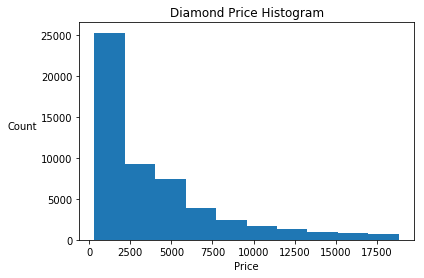

In [25]:
plt.hist(diamonds['price'])
plt.title('Diamond Price Histogram')
plt.xlabel('Price')
plt.ylabel('Count', horizontalalignment = 'right', rotation = 0)

Here we can see the skew reflected in the histogram as expected. The only numerical observation in diamonds with left skew was depth. Let's take a look at that and see what the distribution looks like.

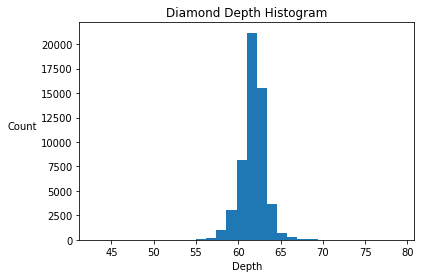

In [26]:
plt.hist(diamonds['depth'], bins = 30)
plt.title('Diamond Depth Histogram')
plt.xlabel('Depth')
plt.ylabel('Count', horizontalalignment = 'right', rotation = 0)
plt.show()

It's a little trickier to see in this graph but there is a slight negative skew in the depth histogram as we expected since the mean is less than the median.

<a id='s4_3'></a>
### **Variance**
* **sample formula**
    - A formula, that is calculated on a sample. The value obtained is a statistic.
* **population formula**
    - A formula, that is calculated on a population. The value obtained is a parameter.
* **measures of variability**
    - Measures that describe the data through the level of dispersion (variability). The most common ones are variance and standard deviation.
* **variance**
    - Measures the dispersion of the dataset around its mean. It is measured in units squared. Denoted $\sigma ^2$ for a population and $s ^ 2$ for a sample.
    
In statistics, you will use different formulas based on if you are working with sample data or population data.

When working with population data, you know every single data point, so you are 100% sure of the measures you calculate.

When working with sample data and you generate a statistic, it is an approximation of the population parameter. If you extract 10 different samples, you will arrive at 10 different measures

In [27]:
print('Diamonds population mean price parameter:')
print(diamonds['price'].mean())
print('Diamonds sample mean price statistic:')
for i in range(10):
    print(diamonds['price'].sample(1000).mean())

Diamonds population mean price parameter:
3932.799721913237
Diamonds sample mean price statistic:
3964.293
4242.901
3860.006
4020.048
3812.758
3773.168
3922.312
3874.104
3959.322
4180.973


Statistic formulas are adjusted to reflect this difference.

Sample Mean:

$\huge\frac{\sum_{i=1}^n x_i}{n}$

where

$n = \textsf{# of observations in the sample}$

Population Mean:

$\huge\frac{\sum_{i=1}^N x_i}{N}$

where

$N = \textsf{# of observations in the population}$

Technically these are two different formulas but they are computed the same way.

Population variance:

$$\large\sigma^2 = \frac{\sum_{i=1}^N(x_i-\mu)^2}{N}$$ 

The sum of squared differences between the observed value and the mean divided by total number of observations.

Sample variance:

$$\large s^2 = \frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}$$

In the numerators of the above formulas, the difference between the mean and observation is squared because the distance from the mean should be non-negative. This also prevents negative values cancelling positive values in the equation. It also amplifies the effect of large differences.

In [28]:
print('Diamonds carat variance parameter:')
print(diamonds['carat'].var())
print('Diamonds sample variance statistic:')
for i in range(10):
    print(diamonds['carat'].sample(1000).var())

Diamonds carat variance parameter:
0.22468665982273753
Diamonds sample variance statistic:
0.22822226226226142
0.24443032942942913
0.22425479469469503
0.20133995755755754
0.213436196196196
0.20660484234234225
0.23502854494494485
0.2279929429429431
0.23747754594594686
0.21837072712712746


In [29]:
for x in list(diamonds):
    try:
        print(x, diamonds[x].var())
    except:
        print(x, 'non-numerical data')

Unnamed: 0 242464795.0
carat 0.22468665982273753
cut non-numerical data
color non-numerical data
clarity non-numerical data
depth 2.05240384317702
table 4.992948075335832
price 15915629.424300838
x 1.2583471730443379
y 1.3044716138352839
z 0.4980108625865544


Price has the highest variance so lets take a look at how the data is concentrated around the mean.

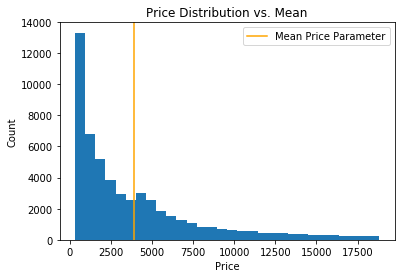

In [30]:
plt.hist(diamonds['price'], bins = 30)
plt.axvline(diamonds['price'].mean(), color = 'orange', label = 'Mean Price Parameter')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution vs. Mean')
plt.legend()
plt.show()

Now let's look at a variable with low variance. Depth seems to be a good example of this.

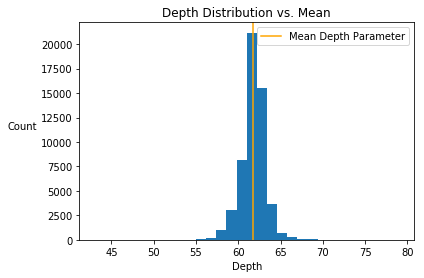

In [31]:
plt.hist(diamonds['depth'], bins = 30)
plt.axvline(diamonds['depth'].mean(), color = 'orange', label = 'Mean Depth Parameter')
plt.xlabel('Depth')
plt.ylabel('Count', horizontalalignment = 'right', rotation = 0)
plt.title('Depth Distribution vs. Mean')
plt.legend()
plt.show()

We can see in this chart that the depth observations are much more closely concentrated around the mean compared with price observations.

<a id='s4_4'></a>
### **Standard Deviation and Coefficient of Variation**

* **standard deviation**
    - Measures the dispersion of the dataset around its mean. It is measured in original units. It is equal to the square root of the variance. Denoted σ for a population and s for a sample.
    
In most analyses, the standard deviation is much more useful than the variance as it is measured in original units and the variance can be extremely large.

Population standard deviation:

$$\large\sigma = \sqrt{\sigma ^2}$$

Sample standard deviation:

$$\large s = \sqrt{s^2}$$

In [32]:
print('Diamonds carat standard deviation:')
print(diamonds['carat'].std())
print('Diamonds sample standard deviation statistic:')
for i in range(10):
    print(diamonds['carat'].sample(1000).std())

Diamonds carat standard deviation:
0.47401124440538067
Diamonds sample standard deviation statistic:
0.4873257616810322
0.444943538274523
0.47162970058561143
0.4847556968057058
0.4427843008023619
0.481342629139189
0.46622132804787875
0.4900104323622342
0.4620738107776799
0.4668572574125829


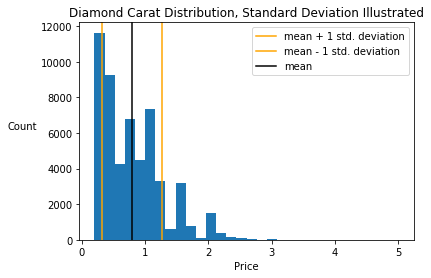

In [33]:
plt.hist(diamonds['carat'], bins = 30)
plt.ylabel('Count', rotation = 0, horizontalalignment = 'right')
plt.xlabel('Price')
plt.title('Diamond Carat Distribution, Standard Deviation Illustrated')
plt.axvline(diamonds['carat'].mean()+diamonds['carat'].std(), color = 'orange', label = 'mean + 1 std. deviation')
plt.axvline(diamonds['carat'].mean()-diamonds['carat'].std(), color = 'orange', label = 'mean - 1 std. deviation')
plt.axvline(diamonds['carat'].mean(), color = 'black', label = 'mean')
plt.legend()
plt.show()

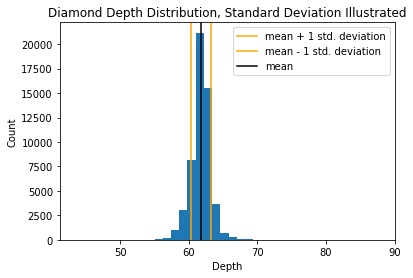

In [34]:
plt.hist(diamonds['depth'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Depth')
plt.title('Diamond Depth Distribution, Standard Deviation Illustrated')
plt.axvline(diamonds['depth'].mean()+diamonds['depth'].std(), color = 'orange', label = 'mean + 1 std. deviation')
plt.axvline(diamonds['depth'].mean()-diamonds['depth'].std(), color = 'orange', label = 'mean - 1 std. deviation')
plt.axvline(diamonds['depth'].mean(), color = 'black', label = 'mean')
plt.xlim(right = 90)
plt.legend(loc = 1)
plt.show()

* **coefficient of variation**
    - Measures the dispersion of the dataset around its mean. It is also called 'relative standard deviation'. It is useful for comparing different datasets in terms of variability.
    
Also known as the relative standard deviation.

Coefficient of Variation is calculated as the standard deviation divided by or relative to the mean.

Population formula:

$$\large c_v = \frac{\sigma}{\mu}$$

Sample formula:
$$\large\widehat{c_v} = \frac{s}{\bar{x}}$$

Standard deviation is the most common measure of variability for a **SINGLE DATASET**

Comparing the standard deviation across two datasets is meaningless whereas a coefficient of variation is not. The coefficient of variation is universal across datasets and perfect for comparisons.

In [35]:
print('Diamonds carat coefficient of variation parameter:')
print(diamonds['carat'].std()/diamonds['carat'].mean())
print('Diamonds sample coefficient of variation statistic:')
for i in range(10):
    sample = diamonds['carat'].sample(1000)
    print(sample.std()/sample.mean())

Diamonds carat coefficient of variation parameter:
0.5940439057859833
Diamonds sample coefficient of variation statistic:
0.5866885616950266
0.5675447913313445
0.5906587323195899
0.5888371859794463
0.580057915325563
0.5889434048733164
0.5895748528744366
0.5779949706884566
0.5755749703474882
0.5954843819455135


<a id='s4_5'></a>
### **Covariance**
* **univariate measure**
    - A measure which refers to a single variable.
* **multivariate measure**
    - A measure which refers to multiple variables.
* **covariance**
    - A measure of relationship between two variables. Usually, because of its scale of measurement, covariance is not directly interpretable. Denoted σxy for a population and sxy for a sample.

If there is a relationship between two variables, we can say that they are correlated.

The main statistic used to measure correlation is called covariance. Covariance can be positive, negative, or zero.

Sample Formula:

$$\large s_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})*(y_i-\bar{y})}{n-1}$$
    
Population Formula:

$$\large \sigma_{xy} = \frac{\sum_{i=1}^N(x_i-\mu_x)*(y_i-\mu_y)}{N}$$

Covariance gives a sense of direction:

if $\gt 0 \rightarrow$ the two variables move together

if $\lt 0 \rightarrow$ the two variables move in opposite directions

if $= 0 \rightarrow$ the two variables are independent

The issue with covariance is that it could be a number like 0,5,100923409234, -.00123120348 . These values vary wildly in their scale and thus covariance can be hard to interpret.

The chart below shows the covariance relationship on a grid between all the variables included in the diamonds dataset.

In [36]:
diamonds.cov()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,2.424648e+08,-2789.881850,-776.314805,-3508.278095,-1.906317e+07,-7081.930753,-7039.864013,-4386.754198
carat,-2.789882e+03,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917
depth,-7.763148e+02,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968
table,-3.508278e+03,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996
price,-1.906317e+07,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613
x,-7.081931e+03,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487
y,-7.039864e+03,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320
z,-4.386754e+03,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011


Looking at this chart we can identify large positive and negative values as well as those close to 0 and attempt to plot what positive, negative, and non correlative charts would look like.

First, price and carat seems like a logical positive correlation and this is backed up by the large positive covariance value displayed above.

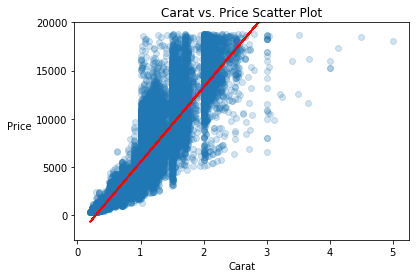

In [37]:
#https://stackoverflow.com/a/26447505
z = np.polyfit(diamonds['carat'],diamonds['price'],1)
p = np.poly1d(z)

plt.scatter(diamonds['carat'],diamonds['price'],alpha = .2)
plt.title('Carat vs. Price Scatter Plot')
plt.ylabel('Price', horizontalalignment = 'right', rotation = 0)
plt.xlabel('Carat')
plt.plot(diamonds['carat'], p(diamonds['carat']), "r-")
plt.ylim(top = 20000)
plt.show()

From this graph we can see the positive covariance value illustrated. As the carat of the diamond increases, so does the price and vice versa. These two variables move together.

I've also included a trendline which slopes towards the top right of the graph indicating a positive correlation.

Now let's look at a negative correlation. Table and depth have a negative covariance value.

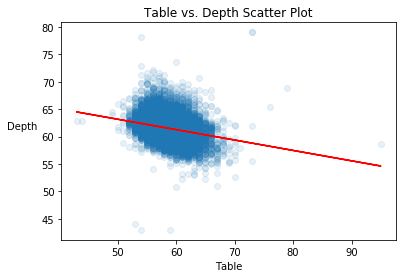

In [38]:
z = np.polyfit(diamonds['table'],diamonds['depth'],1)
p = np.poly1d(z)

plt.scatter(diamonds['table'], diamonds['depth'], alpha = .1)
plt.title('Table vs. Depth Scatter Plot')
plt.ylabel('Depth', horizontalalignment = 'right', rotation = 0)
plt.xlabel('Table')
plt.plot(diamonds['table'], p(diamonds['table']), "r-")
plt.show()

Looking at the graph above, we can see that the trendline has a negative slope. These variables move in opposite directions. As table is increased depth is decreased. As depth is increased the table is decreased.

Now for an example with little or no correlation let's take a look at price and depth.

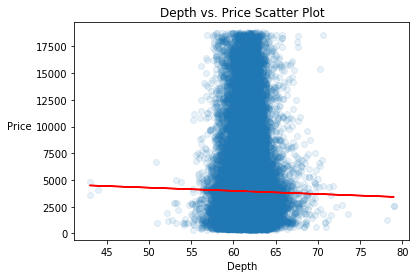

In [39]:
z = np.polyfit(diamonds['depth'],diamonds['price'],1)
p = np.poly1d(z)

plt.scatter(diamonds['depth'], diamonds['price'], alpha = .1)
plt.title('Depth vs. Price Scatter Plot')
plt.ylabel('Price', horizontalalignment = 'right', rotation = 0)
plt.xlabel('Depth')
plt.plot(diamonds['depth'], p(diamonds['depth']), "r-")
plt.show()

Here we can see two variables with little or no covariance illustrated. A diamond with a depth of 60 might be worth 2500$ or it might be worth $18000. The point is that the depth does not indicate anything about the price and vice versa. There is no little to no discernible relationship between the two variables. Price and depth can be said to be independent of each other. This is reflected in that the trendline is almost completely horizontal indicating that there is no trend. 

<a id='s4_6'></a>
### **Correlation**
* **linear correlation coefficient**
    - A measure of relationship between two variables. Very useful for direct interpretation as it takes on values from [-1,1]. Denoted ρxy for a population and rxy for a sample.
* **correlation**
    - A measure of the relationship between two variables. There are several ways to compute it, the most common being the linear correlation coefficient.
    
Correlation adjusts covariance, so that the relationship between the two variables becomes easy and intuitive to interpret.

Correlation Coefficient =

$$\large \frac{Cov(x,y)}{std(x) * std(y)}$$

for a sample:

$$\large \frac{s_{xy}}{s_xs_y}$$

for a population:

$$\large \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$

the range for a correlation coefficient:

$$\large-1 \leq \textsf{correlation coefficient} \leq 1$$

A correlation coefficient of 1 is also known as a perfect positive correlation. This means that the entire variability of one variable is explained by the other.

A correlation of 0 means that the two variables are absolutely independent of each other.

A perfect negative correlation is -1.

The correlation of X and Y is the same as the correlation between Y and X. The formulas for correlation are completely symmetrical with respect to both variables.

**CORRELATION DOES NOT IMPLY CAUSATION**

In [40]:
diamonds.corr(method = 'pearson')

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


This handy built in function allows us to easily determine the correlation of variables in the dataset. Some things to observe here:
- logically the correlation between a variable itself is 1. thus the line of 1's  at (x,x) on the chart
- Price and carat do indeed have a strong correlation, ~.92
- Depth and table have the strongest negative correlation, ~-.3

## Section 6: Distributions

<a id='s6_1'></a>
### What is a Distribution?
- **Distribution**
    - A distribution is a function that shows the possible values for a variable and the probability of their occurence

<a id='s6_2'></a>
### The Normal Distribution
- **Bell curve**
    - A common name for the normal distribution
- **Gaussian Distribution**
    - The original name for the normal distribution. Named after the famous mathematician Gauss, who was the first to explore it through his work on the Gaussian function.
- **To control for the mean/std/etc**
    - Holding this particular value constant, we change the other variables and ovserve the effect

<a id='s6_3'></a>
### The Standard Normal Distribution

- **Standard Normal Distribution**
    - a normal distribution with a mean of 0, and a standard deviation of 1
- **z-statistic**
    - the statistic associated with the normal distribution.
- **Standardized variable**
    - in statistics, we usually standardize a variable using the z-score formula. this is done by first subtracting the mean and then dividing by the standard deviation

<a id='s6_4'></a>
### Understanding the Central Limit Theorem
- **Central Limit Theorem**
    - No matter the distribution of the underlying dataset, the sampling distribution of the means of the dataset approximate a normal distribution.
- **Sampling Distribution**
    - the distribution of a sample

<a id='s6_5'></a>
### Standard Error
- **Standard Error**
    - The standard deviation of the sampling distribution. it takes into account the size of the distribution